In [ ]:
# TLDR

# St05 explores the use of color-color indices to identify AGN in the MIR, and defines a set of criteria to do so.



# EXPANDED

# The tight correlation between BH mass and bulge mass is difficult to probe due to a lack of a robust census. The IR regime provides a means of probing obscured AGN populations 
# to this end. Dust obscuration, which impacts UV, optical and X-ray surveys, is a strong, largely isotropic emitter in the M-FIR regime (> 20 um). Furthermore, SEDs sampling
# the MIR window are distinct. Color-color diagrams are one of the diagnostic tools used to exploit this. 

# St05 note the following trends in PAH sources:

# At 0.2 < z < 0.5 galaxies appear redder in the [3.6] - [4.5] index as the 3.3 um PAH feature shifts through the IRAC 4.5 um band.
# At z > 1, additional reddening reflects the 1.6 um photospheric emission ahifting from the 3.6 um band to the 4.5 um band. 
# At z < 0.6 galaxies span 0 < [5.8] - [8.0] < 3 due to the 6.2 um and 7.7 um PAH features shifting through the 8.0 band.
# The 6.7 and 7.7 um features are much stronger than the 3.3 um feature, resulting in [5.8] - [8.0] spread > [3.6] - [4.5] spread for normal galaxies.
# At z ~ 1.3 the 3.3 um feature causes a modest, broad red bump in the [5.8] - [8.0] index.
# At z > 2, the 1.6 um bump causes template reddening once again.

# The most notable feature of AGN sources in MIR CC space is the broad vertical branch. They state the following:

# The spread of [5.8] - [8.0] index in AGN is restricted by a lack of PAH emission. 
# The [3.6] - [4.5] index of AGN is redder than that of low z normal galaxies due to the lack of a composite stellar peak at ~ 1.6 um. A power-law continuum dominates instead.
# AGN tend to be redder than normal galaxies in the MIR, mirroring their tendency to be bluer in the UV.
# The reddening of AGN in [3.6] - [4.5] at z > 1 and in [5.8] - [8.0] at z > 2 is suggestive of contributions to obs MIR flux from the 1.6 um stellar bump.

# They define the following boundaries within which they expect AGN to reside:

# ([5.8] - [8.0]) > 0.6
# ([3.6] - [4.5]) > 0.2 * ([5.8] - [8.0]) + 0.18
# ([3.6] - [4.5]) > 2.5 * ([5.8] - [8.0]) - 3.5

# They state that the left boundary  protects against higher z galaxies and is not critical for optically bright samples, while the right boundary approximates the outer
# range of AGN colours. They caution that these criteria may preferentially omit AGN at z ~ 0.8 and z ~ 2, and that some of the sources classified as AGN are likely moderate
# redshift galaxies.

In [9]:
# IMPORT PACKAGES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import os

In [15]:
# READ AND REFINE

# Read Data

cdfs = pd.read_csv(os.path.join('/', 'Users', 'jess', 'Desktop', 'data', 'raw', 'cdfs', 'cdfs_main_agn_sfr_snr.csv'))
cos = pd.read_csv(os.path.join('/', 'Users', 'jess', 'Desktop', 'data', 'raw', 'cosmos', 'cos_main_agn_sfr_snr.csv'))
uds = pd.read_csv(os.path.join('/', 'Users', 'jess', 'Desktop', 'data', 'raw', 'uds', 'uds_main_agn_sfr_snr.csv'))


# Require use == 1

cdfs_use = cdfs[cdfs['use'] == 1]
cos_use = cos[cos['use'] == 1]
uds_use = uds[uds['use'] == 1]



# Reduce data to those with use == 1 and SNR (IRAC/MIPS) > 3 

cdfs_use = cdfs[(cdfs['use'] == 1) & (cdfs['SNR_IRAC_36'] > 3) & (cdfs['SNR_IRAC_45'] > 3) & (cdfs['SNR_IRAC_58'] > 3) & (cdfs['SNR_IRAC_80'] > 3) & (cdfs['SNR_MIPS_24'] > 3)]
cos_use = cos[(cos['use'] == 1) & (cos['SNR_IRAC_36'] > 3) & (cos['SNR_IRAC_45'] > 3) & (cos['SNR_IRAC_58'] > 3) & (cos['SNR_IRAC_80'] > 3) & (cos['SNR_MIPS_24'] > 3)]
uds_use = uds[(uds['use'] == 1) & (uds['SNR_IRAC_36'] > 3) & (uds['SNR_IRAC_45'] > 3) & (uds['SNR_IRAC_58'] > 3) & (uds['SNR_IRAC_80'] > 3) & (uds['SNR_MIPS_24'] > 3)]

In [11]:
# MASKS AND PARAMETERS

# Redshift Masks

cdfs_z01 = (0 < np.where(cdfs_use['z_spec'] == -99, cdfs_use['z_peak'], cdfs_use['z_spec'])) & (np.where(cdfs_use['z_spec'] == -99, cdfs_use['z_peak'], cdfs_use['z_spec']) < 1)
cdfs_z12 = (1 < np.where(cdfs_use['z_spec'] == -99, cdfs_use['z_peak'], cdfs_use['z_spec'])) & (np.where(cdfs_use['z_spec'] == -99, cdfs_use['z_peak'], cdfs_use['z_spec']) < 2)
cdfs_z23 = (2 < np.where(cdfs_use['z_spec'] == -99, cdfs_use['z_peak'], cdfs_use['z_spec'])) & (np.where(cdfs_use['z_spec'] == -99, cdfs_use['z_peak'], cdfs_use['z_spec']) < 3)
cdfs_z34 = (3 < np.where(cdfs_use['z_spec'] == -99, cdfs_use['z_peak'], cdfs_use['z_spec'])) & (np.where(cdfs_use['z_spec'] == -99, cdfs_use['z_peak'], cdfs_use['z_spec']) < 4)
cdfs_z4 = (4 < np.where(cdfs_use['z_spec'] == -99, cdfs_use['z_peak'], cdfs_use['z_spec']))

cos_z01 = (0 < np.where(cos_use['z_spec'] == -99, cos_use['z_peak'], cos_use['z_spec'])) & (np.where(cos_use['z_spec'] == -99, cos_use['z_peak'], cos_use['z_spec']) < 1)
cos_z12 = (1 < np.where(cos_use['z_spec'] == -99, cos_use['z_peak'], cos_use['z_spec'])) & (np.where(cos_use['z_spec'] == -99, cos_use['z_peak'], cos_use['z_spec']) < 2)
cos_z23 = (2 < np.where(cos_use['z_spec'] == -99, cos_use['z_peak'], cos_use['z_spec'])) & (np.where(cos_use['z_spec'] == -99, cos_use['z_peak'], cos_use['z_spec']) < 3)
cos_z34 = (3 < np.where(cos_use['z_spec'] == -99, cos_use['z_peak'], cos_use['z_spec'])) & (np.where(cos_use['z_spec'] == -99, cos_use['z_peak'], cos_use['z_spec']) < 4)
cos_z4 = (4 < np.where(cos_use['z_spec'] == -99, cos_use['z_peak'], cos_use['z_spec']))

uds_z01 = (0 < np.where(uds_use['z_spec'] == -99, uds_use['z_peak'], uds_use['z_spec'])) & (np.where(uds_use['z_spec'] == -99, uds_use['z_peak'], uds_use['z_spec']) < 1)
uds_z12 = (1 < np.where(uds_use['z_spec'] == -99, uds_use['z_peak'], uds_use['z_spec'])) & (np.where(uds_use['z_spec'] == -99, uds_use['z_peak'], uds_use['z_spec']) < 2)
uds_z23 = (2 < np.where(uds_use['z_spec'] == -99, uds_use['z_peak'], uds_use['z_spec'])) & (np.where(uds_use['z_spec'] == -99, uds_use['z_peak'], uds_use['z_spec']) < 3)
uds_z34 = (3 < np.where(uds_use['z_spec'] == -99, uds_use['z_peak'], uds_use['z_spec'])) & (np.where(uds_use['z_spec'] == -99, uds_use['z_peak'], uds_use['z_spec']) < 4)
uds_z4 = (4 < np.where(uds_use['z_spec'] == -99, uds_use['z_peak'], uds_use['z_spec']))



# Define Plot Parameters

kde_params = {'cmap': 'Greys', 'fill': False, 'alpha': 0.7, 'zorder': 0, 'linewidths': 2}

bw_sct_params = {'s': 230, 'color': 'xkcd:white', 'marker': 's', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}
gw_sct_params = {'s': 210, 'color': 'xkcd:white', 'marker': 'D', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}
rw_sct_params = {'s': 200, 'color': 'xkcd:white', 'marker': 'o', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}

r_sct_params = {'s': 150, 'color': 'xkcd:salmon', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}
g_sct_params = {'s': 160, 'color': 'xkcd:hospital green', 'marker': 'D', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}
b_sct_params = {'s': 180, 'color': 'xkcd:periwinkle blue', 'marker': 's', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}

In [ ]:
# Find relationship between AB and VEGA magnitudes for each filter

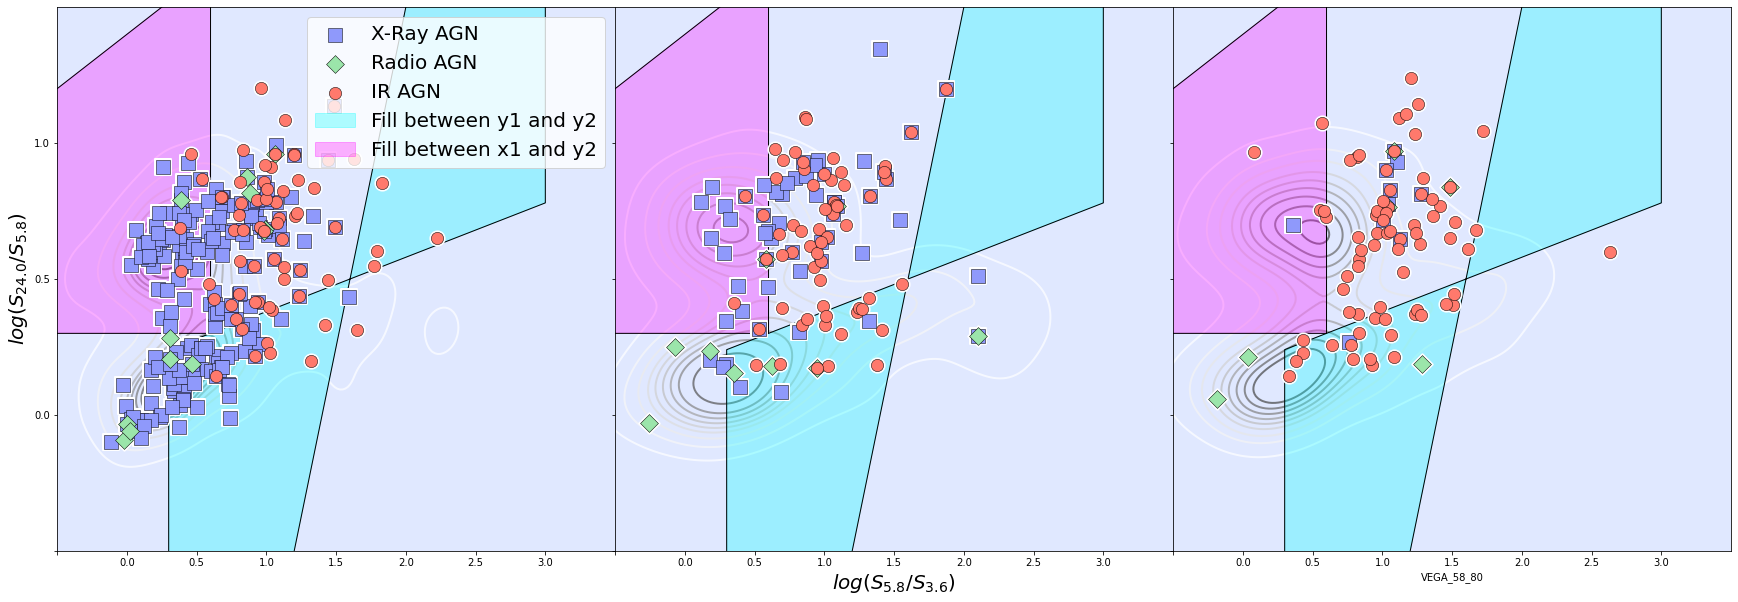

In [49]:
# FIGURE 1

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (30, 10))

plt.subplots_adjust(wspace = 0.0)

subplots = [ax1, ax2, ax3]



# Density Plots

sns.kdeplot(x = 'VEGA_58_80', y = 'VEGA_36_45', data = cdfs_use[(cdfs_use['agn'] == 0)], **kde_params, ax = ax1)
sns.kdeplot(x = 'VEGA_58_80', y = 'VEGA_36_45', data = cos_use[(cos_use['agn'] == 0)], **kde_params, ax = ax2)
sns.kdeplot(x = 'VEGA_58_80', y = 'VEGA_36_45', data = uds_use[(uds_use['agn'] == 0)], **kde_params, ax = ax3)



# Scatter Plots

# Loop Parameters

agn_labels = {'xray_agn': 'X-Ray AGN', 'radio_agn': 'Radio AGN', 'ir_agn': 'IR AGN'}
agn_types = ['xray_agn', 'radio_agn', 'ir_agn']
fields = ['CDFS', 'COSMOS', 'UDS']

w_params = [bw_sct_params, gw_sct_params, rw_sct_params]
rgb_params = [b_sct_params, g_sct_params, r_sct_params]
datasets = [cdfs_use, cos_use, uds_use]



# White Scatter Loop

for dataset, ax in zip(datasets, subplots):

    for agn_type, w_param, rgb_param in zip(agn_types, w_params, rgb_params):
        
        ax.scatter(
            x = dataset.loc[dataset[agn_type] == 1, 'VEGA_58_80'],
            y = dataset.loc[dataset[agn_type] == 1, 'VEGA_36_45'],
            **w_param)



# RGB Scatter Loop

for dataset, ax in zip(datasets, subplots):

    for agn_type, w_param, rgb_param in zip(agn_types, w_params, rgb_params):
       
        ax.scatter(
            x = dataset.loc[dataset[agn_type] == 1, 'VEGA_58_80'],
            y = dataset.loc[dataset[agn_type] == 1, 'VEGA_36_45'],
            label = agn_labels.get(agn_type, agn_type), 
            **rgb_param)
        


# Plot Detail Loop
        
xlim_1 = [-0.5, 3.5]
ylim_1 = [-0.5, 1.5]

xtick_1 = np.arange(-0.5, 3.5, 0.5)
ytick_1 = np.arange(-0.5, 1.5, 0.5)

x = np.linspace(0.3, 3, 1000)
y1 = 0.2 * x + 0.18
y2 = 2.5 * x - 3.5
x1 = 0.6




for ax in subplots:

    # Axes limits

    ax.set_xlim(xlim_1)
    ax.set_ylim(ylim_1)

    # Axes ticks

    ax.set_xticks(xtick_1)
    ax.set_yticks(ytick_1)

    # Remove first and last ticks

    xticks = ax.xaxis.get_major_ticks()
    xticks[0].label1.set_visible(False)

    yticks = ax.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False)


    # Stern wedge

    ax.fill_between(x, y1, y2, color='cyan', alpha=0.3, label='Fill between y1 and y2')
    ax.fill_betweenx(x, x1, y2, color='magenta', alpha=0.3, label='Fill between x1 and y2')

    ax.fill_between(x, y1, y2, color = 'none', edgecolor = 'black', alpha = 1, zorder = 2)
    ax.fill_betweenx(x, x1, y2, color = 'none', edgecolor = 'black', alpha = 1, zorder = 2)

    #ax.fill_between(x, y2, x1, color = 'w', alpha = 0.3, zorder = 2)
    # ax.fill_between(x, y1, y2, color = 'none', edgecolor = 'black', alpha = 1, zorder = 2)

    # Draw a straight horizontal line at y = 0

    #ax.axhline(0, color = 'w', linewidth = 1, linestyle = '-', zorder = 1)

    # Draw a straight vertical line at x = 0.25

    #ax.axvline(0.25, color = 'w', linewidth = 1, linestyle = '-', zorder = 1)

    # Set face colour

    ax.set_facecolor('#e0e8ff')



# Axes Labels and Legend

ax1.legend(loc = 'upper right', fontsize = '20', frameon = True)

ax1.set_ylabel('$log (S_{24.0}/S_{5.8})$', size = '20')
ax2.set_xlabel('$log (S_{5.8}/S_{3.6})$', size = '20')

ax1.set_xlabel('')
ax3.set_ylabel('')



plt.show()

In [ ]:
x = np.linspace(-1.5, 3, 1000)
y1 = 0.2 * x + 0.18
y2 = 2.5 * x - 3.5